In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import cv2
import datetime
import sklearn
import cufflinks


from chart_studio import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandas_datareader import data, wb
%matplotlib inline

In [107]:
init_notebook_mode(connected=True)

Data Gathering

In [108]:
customer = pd.read_csv(r".\data\Ecommerce Customers.csv")

Data pre-processing

In [109]:
customer.head()

Email  ... Yearly Amount Spent
0      mstephenson@fernandez.com  ...          587.951054
1              hduke@hotmail.com  ...          392.204933
2               pallen@yahoo.com  ...          487.547505
3        riverarebecca@gmail.com  ...          581.852344
4  mstephens@davidson-herman.com  ...          599.406092

[5 rows x 8 columns]

In [110]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [111]:
customer.describe()

Avg. Session Length  ...  Yearly Amount Spent
count           500.000000  ...           500.000000
mean             33.053194  ...           499.314038
std               0.992563  ...            79.314782
min              29.532429  ...           256.670582
25%              32.341822  ...           445.038277
50%              33.082008  ...           498.887875
75%              33.711985  ...           549.313828
max              36.139662  ...           765.518462

[8 rows x 5 columns]

In [112]:
customer.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Join Two column

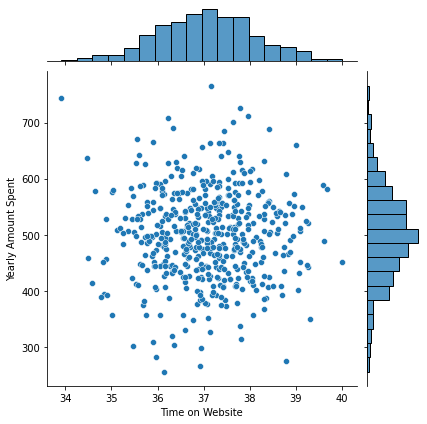

In [113]:
sns.jointplot(data=customer,x="Time on Website",y="Yearly Amount Spent")

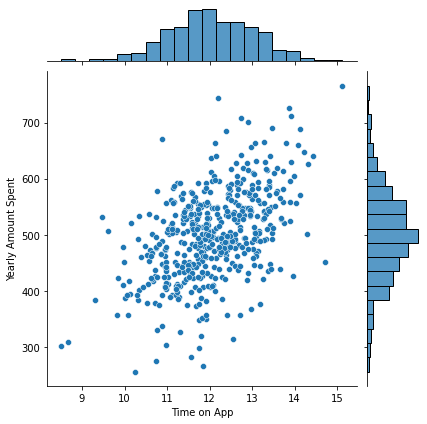

In [114]:
sns.jointplot(data=customer, x="Time on App",y="Yearly Amount Spent")

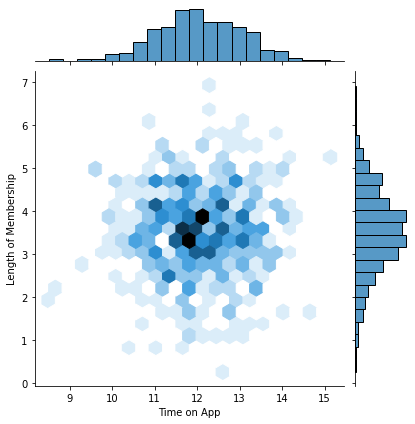

In [115]:
sns.jointplot(data=customer, x="Time on App", y="Length of Membership", kind="hex")

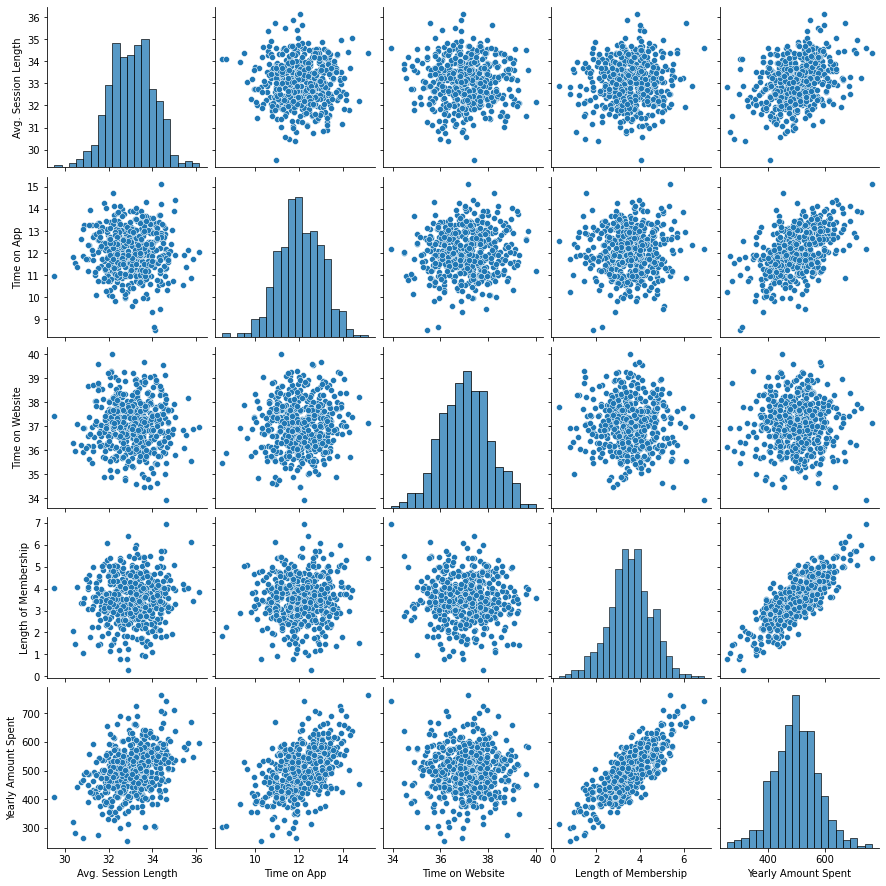

In [116]:
sns.pairplot(customer)

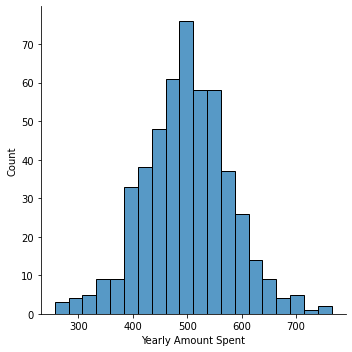

In [117]:
sns.displot(customer["Yearly Amount Spent"])

In [118]:
customer.corr()

Avg. Session Length  ...  Yearly Amount Spent
Avg. Session Length              1.000000  ...             0.355088
Time on App                     -0.027826  ...             0.499328
Time on Website                 -0.034987  ...            -0.002641
Length of Membership             0.060247  ...             0.809084
Yearly Amount Spent              0.355088  ...             1.000000

[5 rows x 5 columns]

<AxesSubplot:>

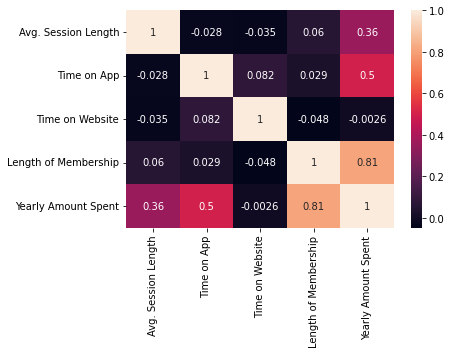

In [119]:
sns.heatmap(customer.corr(), annot=True)

Linear Model (lmplot) for two feature clear visualization

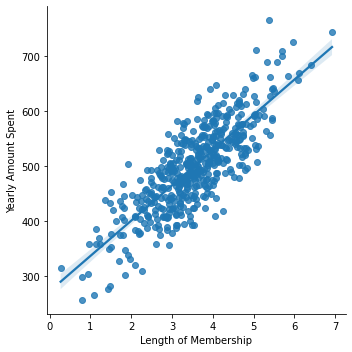

In [120]:
sns.lmplot(data=customer, x="Length of Membership", y="Yearly Amount Spent")

Feature Engineering

In [121]:
feature = customer[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]

In [122]:
target = customer[["Yearly Amount Spent"]]

Choosing Model(Spliting Data)

In [123]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.3, random_state=101)

In [124]:
xtest.shape, xtrain.shape

((150, 4), (350, 4))

In [125]:
ytest.shape, ytrain.shape

((150, 1), (350, 1))

Training The Model

In [126]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain,ytrain.values.ravel())

LinearRegression()

In [127]:
print(lm.intercept_)

-1047.932782250239


In [128]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Predicting Test Data

In [129]:
predictions = lm.predict(xtest)

In [130]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [131]:
ytest

Yearly Amount Spent
18            452.315675
361           401.033135
104           410.069611
4             599.406092
156           586.155870
..                   ...
147           479.731938
346           488.387526
423           461.112248
17            407.704548
259           375.398455

[150 rows x 1 columns]

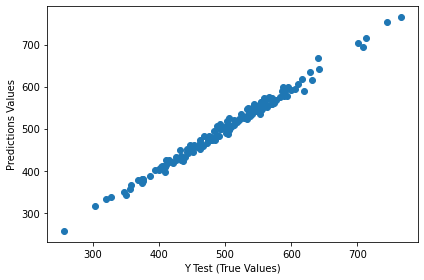

In [132]:
plt.scatter(ytest,predictions)
plt.xlabel("Y Test (True Values)")
plt.ylabel("Predictions Values")
plt.tight_layout()
plt.show()

Evaluating The Model

In [133]:
from sklearn import metrics

In [134]:
print("MAE :",metrics.mean_absolute_error(ytest, predictions))
print("MSE :",metrics.mean_squared_error(ytest,predictions))
print("RMSE :",np.sqrt(metrics.mean_squared_error(ytest, predictions)))
print("R2S :",metrics.r2_score(ytest,predictions))

MAE : 7.228148653430834
MSE : 79.81305165097443
RMSE : 8.933815066978633
R2S : 0.9890046246741234


In [135]:
metrics.explained_variance_score(ytest,predictions)

0.9890771231889607

Residuals

In [136]:
# sns.displot((ytest-predictions), bins=50)

Conclusion

In [137]:
cdf = pd.DataFrame(lm.coef_,feature.columns, columns=["Coeff"])
cdf

Coeff
Avg. Session Length   25.981550
Time on App           38.590159
Time on Website        0.190405
Length of Membership  61.279097